# Index

### 1. Importing the Libraries
### 2. Data Preparation/Extraction
### 3. Data Processing/Cleaning
### 4. EDA


#### 4.1 By Geography
##### 4.1.1 City With Most Granted Loans (Top 20)
##### 4.1.2 State With Most Record (Top 20)
##### 4.1.3 State With Most Record (Top 20)
##### 4.1.4 City with most granted loans from each state 
##### 4.1.5 City with Highest And Lowest sum of Loan Amount (Top 20)
##### 4.1.6 State with Highest And Lowest sum of Loan Amount (Top 20)

#### 4.2 By Lender
##### 4.2.1 Lender with most granted loans (Top 20)
##### 4.2.2 Lender with highest sum and average loan 
##### 4.2.3 City and State with most lenders 
##### 4.2.4 Highest Lender from Each City 
##### 4.2.5 Highest Lender from Each State
##### 4.2.5 Highest Lender from Each State

#### 4.3 By Business Type
##### 4.3.1 Most Preferred Business Types
##### 4.3.2 Business Type And Loan Amount
##### 4.3.2 Business Type Owned Based on Gender, Race, Veterran 
###### 4.3.2.1 By Gender
###### 4.3.2.2 By Race
###### 4.3.2.3 By Veterran

#### 4.4 Jobs Reported 
##### 4.4.1 Jobs Reported By Differenct Business Types 
##### 4.4.2 Cities And States with Most Jobs Reported  (Top 10)
##### 4.4.2 Cities And States with Most Jobs Reported  (Top 10)

### 5. Time Series Analysis with Forecasting (Jobs Reported And Loan Amount)
#### 5.1 Jobs Reported In each month 
#### 5.2 Loan Amount Sum in each Month  
#### 5.3 Checking for Random Walk (If current Value is related to previous values) 
#### 5.4 Stationarity Check  
#### 5.5 Seasonality Check  
#### 5.6  AutoCorrelation  
#### 5.7  Forecasting 

# Importing the Libraries

In [1]:
import pandas as pd
from scipy.stats import skew 
import numpy as np  
import scipy.stats
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from os import listdir
import os
from os.path import isfile, join
import pgeocode
import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as sgt
from fbprophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Preparation/Extraction

In [2]:
df=pd.DataFrame()

In [3]:
d = './All Data 0808/'
subdirs = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]

for dir_ in subdirs:
    x=[f for f in listdir(dir_) if isfile(join(dir_, f))][1]
    final_path=dir_+'/'+x
    temp=pd.read_csv(final_path)
    df=pd.concat([df,temp])

df.to_csv('Data.csv',index=False)
df=df.reset_index().drop('index',axis=1)
df.head()

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,149978.000,PELHAM,AL,35124.000,561311.000,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,17.000,05/07/2020,Truist Bank d/b/a Branch Banking & Trust Co,AL-06
1,149900.000,BIRMINGHAM,AL,35242.000,561311.000,Corporation,Unanswered,Female Owned,Unanswered,NaN,39.000,04/13/2020,Peoples Bank of Alabama,AL-06
2,149887.000,TRUSSVILLE,AL,35173.000,238910.000,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,14.000,04/15/2020,Bryant Bank,AL-06
3,149865.000,Trussville,AL,35173.000,621340.000,Self-Employed Individuals,Unanswered,Unanswered,Unanswered,NaN,0.000,04/30/2020,Regions Bank,AL-06
4,149862.000,SPRINGVILLE,AL,35146.000,624221.000,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,19.000,04/12/2020,"South State Bank, National Association",AL-06


df=pd.read_csv('Data.csv')
df=df.iloc[:100000]
df=df.reset_index().drop('index',axis=1)
df.head()

In [4]:
df.shape

(4549613, 14)

# Data Processing/Cleaning

### Null Values

In [5]:
x=pd.DataFrame(df.isnull().sum())
x=x.reset_index()
x.columns=['Column','Null Values']
x['% Of Null Values']=x['Null Values'].apply(lambda x:(x/df.shape[0])*100)
x

,Column,Null Values,% Of Null Values
0,LoanAmount,0,0.000
1,City,186,0.004
2,State,149,0.003
3,Zip,180,0.004
4,NAICSCode,126429,2.779
5,BusinessType,3165,0.070
6,RaceEthnicity,0,0.000
7,Gender,0,0.000
8,Veteran,0,0.000
9,NonProfit,4409022,96.910


In [6]:
df['State'].fillna('Unknown',inplace=True)
df['City'].fillna('Unknown',inplace=True)
df['BusinessType'].fillna('Unknown',inplace=True)
df.drop(['NAICSCode','NonProfit','CD','Zip'],axis=1,inplace=True)

data=df[pd.isnull(df['JobsReported'])]
data=data.reset_index().drop('index',axis=1)
df=df[~(pd.isnull(df['JobsReported']))]

df2=pd.DataFrame(df.groupby('State')['JobsReported'].median()).reset_index()

for i in range(len(data)):
    state=data['State'][i]
    #print(state)
    val=df2[df2['State']==state]['JobsReported'].tolist()[0]
    data['JobsReported'][i]=val

df=pd.concat([df,data])

<ipython-input-6-4cfdbe59dbb5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['JobsReported'][i]=val


In [7]:
x=pd.DataFrame(df.isnull().sum())
x=x.reset_index()
x.columns=['Column','Null Values']
x['% Of Null Values']=x['Null Values'].apply(lambda x:(x/df.shape[0])*100)
x

,Column,Null Values,% Of Null Values
0,LoanAmount,0,0.000
1,City,0,0.000
2,State,0,0.000
3,BusinessType,0,0.000
4,RaceEthnicity,0,0.000
5,Gender,0,0.000
6,Veteran,0,0.000
7,JobsReported,0,0.000
8,DateApproved,0,0.000
9,Lender,0,0.000


In [8]:
df=df.reset_index().drop('index',axis=1)
df['City']=df['City'].apply(lambda x:x.title())
df['DateApproved']=df['DateApproved'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y'))

# EDA 

## By Geography

### City With Most Granted Loans (Top 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

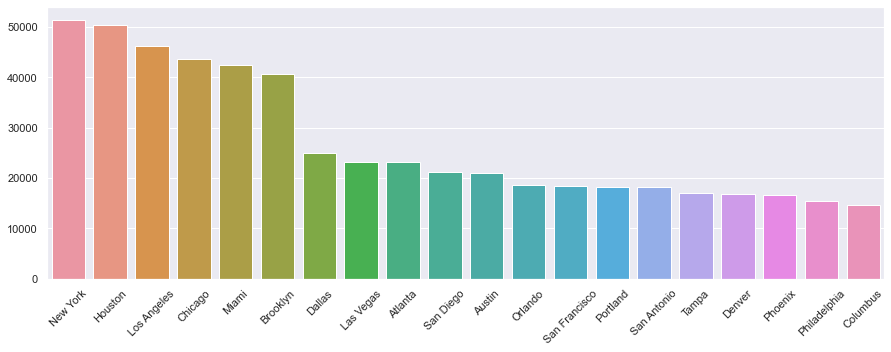

In [9]:
x=df['City'].value_counts()[:20]
plt.figure(figsize=(15,5))
sns.barplot(list(x.index),list(x.values))
plt.xticks(rotation=45)

### State With Most Granted Loans (Top 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text major ticklabel objects>)

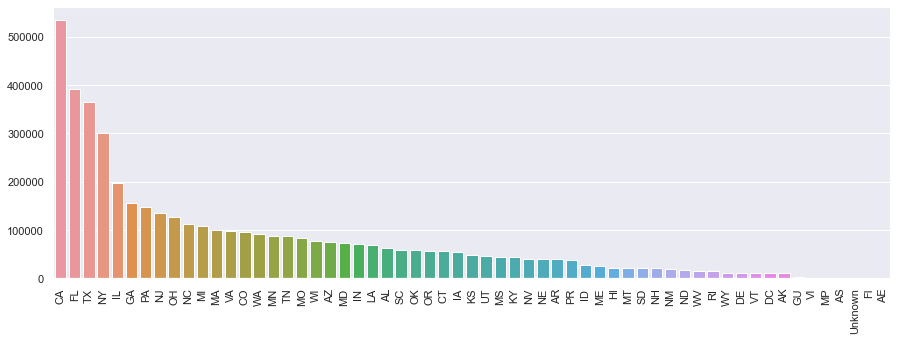

In [10]:
x=df['State'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(list(x.index),list(x.values))
plt.xticks(rotation=90)

### City with most granted loans from each state 

In [11]:
x=pd.DataFrame(df.groupby(['State','City'])['City'].count().sort_values(ascending=False))
x.columns=['Count']
x.head()

,,Count
State,City,
NY,New York,51430
TX,Houston,50038
CA,Los Angeles,46128
IL,Chicago,43702
FL,Miami,42144


### City with Highest And Lowest sum of Loan Amount (Top 20)

In [12]:
#Highest
x1=pd.DataFrame(df.groupby('City')['LoanAmount'].sum().sort_values(ascending=False)[:20])
x1.columns=['Total Loan Amount']
x1.head()

,Total Loan Amount
City,
New York,1954880999.190
Houston,1619066643.330
Los Angeles,1415215833.860
Chicago,1271834850.370
Miami,1162932132.620


In [13]:
#Lowest
x2=pd.DataFrame(df.groupby('City')['LoanAmount'].sum().sort_values()[:20])
x2.columns=['Total Loan Amount']
x2.head()

,Total Loan Amount
City,
Drtroit,20.000
Hrachya Shahinyan,22.000
Punta Gorda,93.320
Panama City Bea,200.000
Paseda,213.000


Text(0.5, 1.0, 'Cities with Lowest Records')

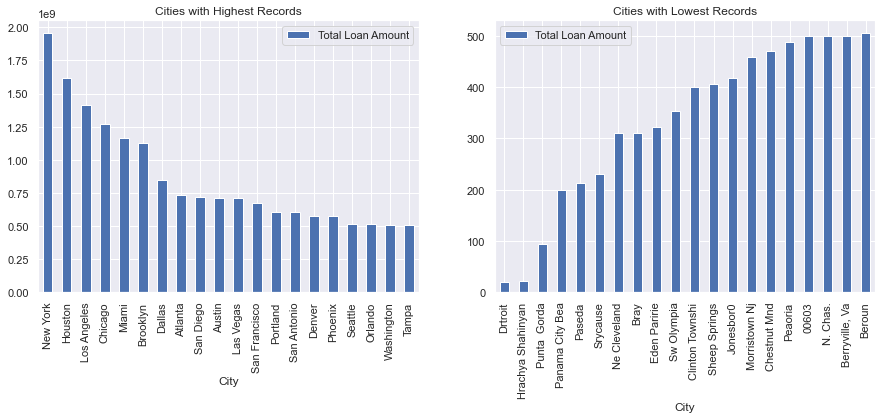

In [14]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x1.plot(kind='bar',ax=axes[0],legend=True)
x2.plot(kind='bar',ax=axes[1],legend=True)


axes[0].set_title('Cities with Highest Records')
axes[1].set_title('Cities with Lowest Records')

### State with Highest And Lowest sum of Loan Amount (Top 20)

In [15]:
#Highest
x1=pd.DataFrame(df.groupby('State')['LoanAmount'].sum().sort_values(ascending=False)[:20])
x1.columns=['Total Loan Amount']
x1.head()

,Total Loan Amount
State,
CA,18472898255.450
TX,11807031808.095
FL,11387232981.620
NY,9898258929.970
IL,5935479964.860


In [16]:
#Lowest
x2=pd.DataFrame(df.groupby('State')['LoanAmount'].sum().sort_values()[:20])
x2.columns=['Total Loan Amount']
x2.head()

,Total Loan Amount
State,
AE,27400.000
FI,42100.000
Unknown,4445660.030
AS,6320884.240
MP,14630538.290


Text(0.5, 1.0, 'States with Lowest Records')

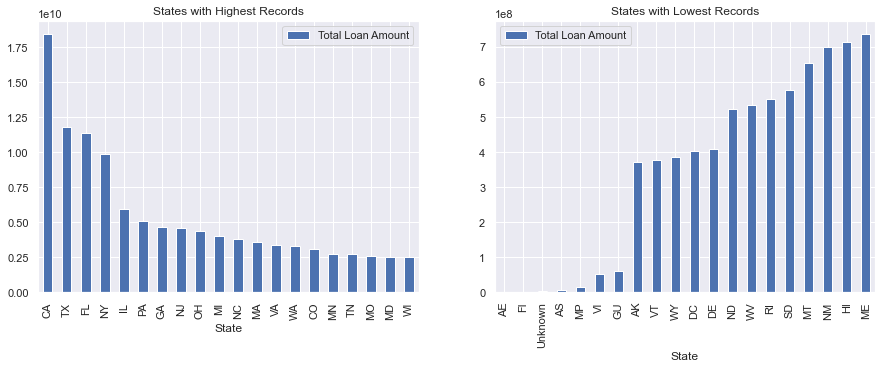

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x1.plot(kind='bar',ax=axes[0],legend=True)
x2.plot(kind='bar',ax=axes[1],legend=True)


axes[0].set_title('States with Highest Records')
axes[1].set_title('States with Lowest Records')

## By Lender

### Lender with most granted loans (Top 20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

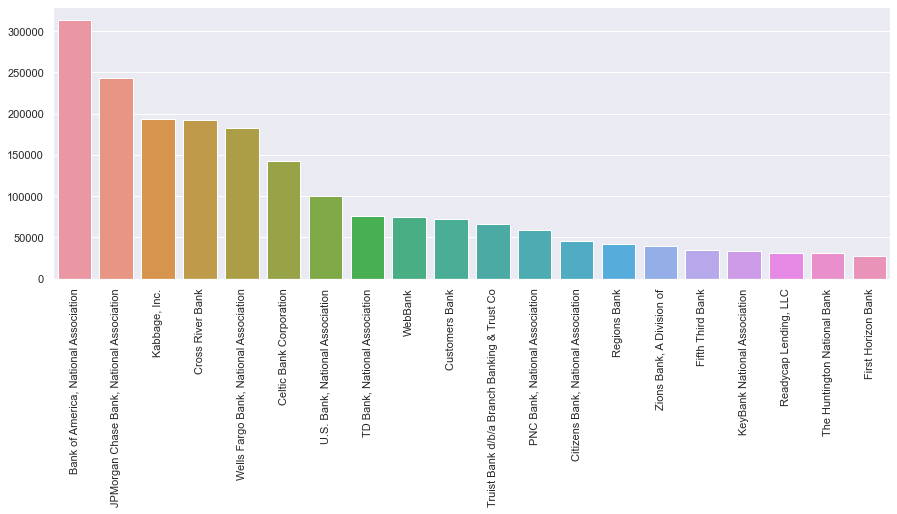

In [18]:
x=df['Lender'].value_counts()[:20]
plt.figure(figsize=(15,5))
sns.barplot(x.index,x.values)
plt.xticks(rotation=90)

### Lender with highest sum and average loan 

Text(0.5, 1.0, 'Lender with Highest average loan')

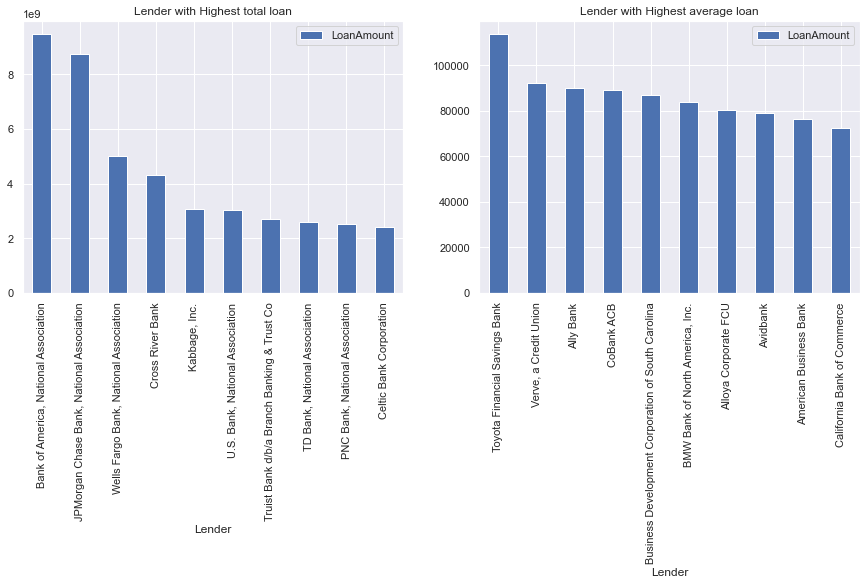

In [19]:
x1=df.groupby('Lender')['LoanAmount'].sum().sort_values(ascending=False)[:10]
x2=df.groupby('Lender')['LoanAmount'].mean().sort_values(ascending=False)[:10]

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x1.plot(kind='bar',ax=axes[0],legend=True)
x2.plot(kind='bar',ax=axes[1],legend=True)


axes[0].set_title('Lender with Highest total loan')
axes[1].set_title('Lender with Highest average loan')

### City and State with most lenders

Text(0.5, 1.0, 'Lender with Highest average loan')

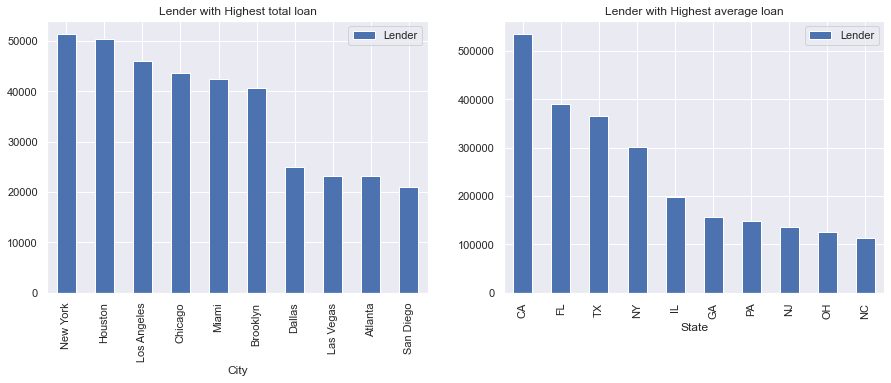

In [20]:
x1=df.groupby('City')['Lender'].count().sort_values(ascending=False)[:10]
x2=df.groupby('State')['Lender'].count().sort_values(ascending=False)[:10]

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x1.plot(kind='bar',ax=axes[0],legend=True)
x2.plot(kind='bar',ax=axes[1],legend=True)


axes[0].set_title('Lender with Highest total loan')
axes[1].set_title('Lender with Highest average loan')

### Highest Lender from Each City

In [21]:
data=pd.DataFrame(df.groupby(['City','Lender'])['Lender'].count().sort_values(ascending=False))
data.columns=['Count']
data=data.reset_index()
data.columns=['City','Lender','Count']
data.head()

,City,Lender,Count
0,New York,"JPMorgan Chase Bank, National Association",13157
1,Brooklyn,"JPMorgan Chase Bank, National Association",8298
2,Los Angeles,"Bank of America, National Association",7160
3,Miami,"Kabbage, Inc.",6381
4,Chicago,Cross River Bank,6337


### Highest Lender from Each State

In [22]:
data=pd.DataFrame(df.groupby(['State','Lender'])['Lender'].count().sort_values(ascending=False))
data.columns=['Count']
data=data.reset_index()
data.columns=['State','Lender','Count']
data.head()

,State,Lender,Count
0,CA,"Bank of America, National Association",84392
1,CA,"Wells Fargo Bank, National Association",52573
2,NY,"JPMorgan Chase Bank, National Association",51673
3,FL,"Bank of America, National Association",51420
4,CA,"JPMorgan Chase Bank, National Association",49625


## Business Types 

### Most Preferred Business Types

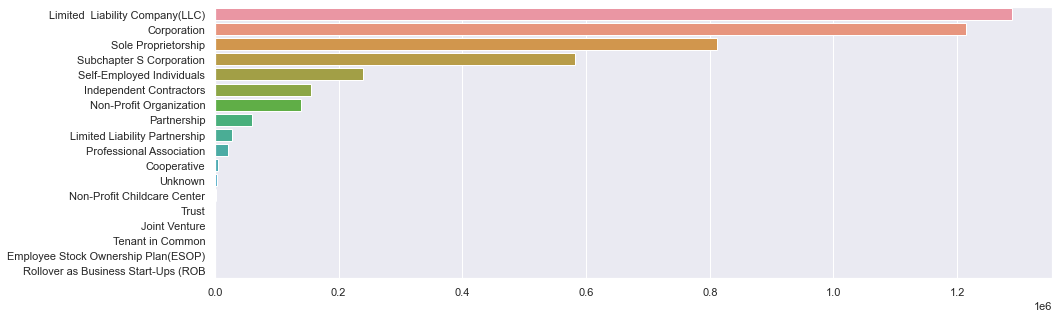

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(list(df['BusinessType'].value_counts().values),list(df['BusinessType'].value_counts().index))

### Business Type And Loan Amount

In [24]:
x1=df.groupby('BusinessType')['LoanAmount'].sum().sort_values(ascending=False)
x2=df.groupby('BusinessType')['LoanAmount'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Business With Highest Average Loan')

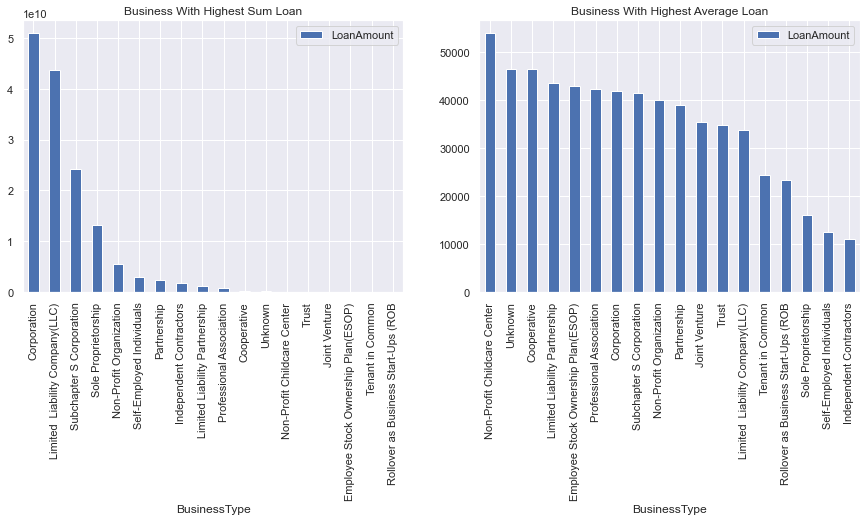

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x1.plot(kind='bar',ax=axes[0],legend=True)
x2.plot(kind='bar',ax=axes[1],legend=True)


axes[0].set_title('Business With Highest Sum Loan')
axes[1].set_title('Business With Highest Average Loan')

## Business Type Owned Based on Gender, Race, Veterran 

In [26]:
def f_count(col):
    data=df[df[col]!='Unanswered']
    x1=pd.DataFrame(data.groupby(['BusinessType',col])[col].count())
    x1.columns=['Count']
    #x1=x1.reset_index()
    return x1

In [27]:
def f_average(col):
    data=df[df[col]!='Unanswered']
    x1=pd.DataFrame(data.groupby(col)['LoanAmount'].mean().sort_values(ascending=False))
    x1.columns=['Average Loan Amount']
    x1=x1.reset_index()
    return x1

### By Gender 

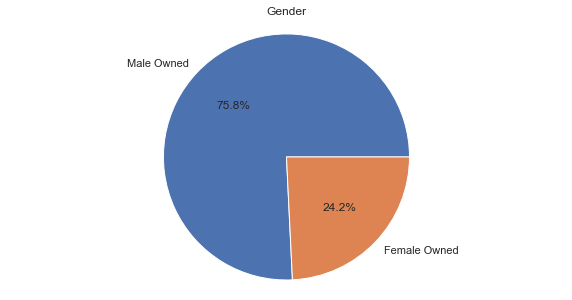

In [28]:
data=df[df['Gender']!='Unanswered']
vals=list(data['Gender'].value_counts().values)
labels=list(data['Gender'].value_counts().index)
plt.figure(figsize=(10,5))
plt.pie(vals,labels=labels,autopct='%1.1f%%')
plt.title('Gender')
plt.axis('equal')
plt.show()

#### Business Type Owned By Different Gender 

In [29]:
data=f_count('Gender')
data

Count
BusinessType                        Gender              
Cooperative                         Female Owned     194
                                    Male Owned       746
Corporation                         Female Owned   62421
                                    Male Owned    223777
Employee Stock Ownership Plan(ESOP) Female Owned      11
                                    Male Owned        47
Independent Contractors             Female Owned    5482
                                    Male Owned      8742
Joint Venture                       Female Owned      43
                                    Male Owned       114
Limited  Liability Company(LLC)     Female Owned   69456
                                    Male Owned    209150
Limited Liability Partnership       Female Owned    1367
                                    Male Owned      4888
Non-Profit Childcare Center         Female Owned     246
                                    Male Owned       131
Non-Profit Organization             Female Owned    5605
                                    Male Owned     12098
Partnership                         Female Owned    3001
                                    Male Owned     10315
Professional Association            Female Owned     927
                                    Male Owned      2621
Rollover as Business Start-Ups (ROB Female Owned       2
                                    Male Owned         1
Self-Employed Individuals           Female Owned    6227
                                    Male Owned     15645
Sole Proprietorship                 Female Owned   40080
                                    Male Owned    114786
Subchapter S Corporation            Female Owned   28924
                                    Male Owned     97485
Tenant in Common                    Female Owned      10
                                    Male Owned        42
Trust                               Female Owned      44
                                    Male Owned       136
Unknown                             Female Owned      44
                                    Male Owned       202

#### Average Loan Amount By Business Type Based On Genders 

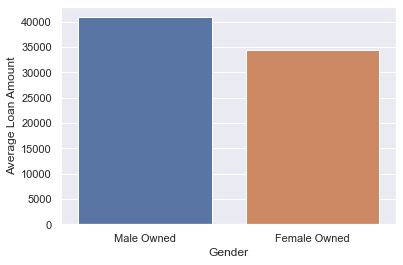

In [30]:
data=f_average('Gender')
sns.barplot(data['Gender'],data['Average Loan Amount'])

### By Race Ethnicity

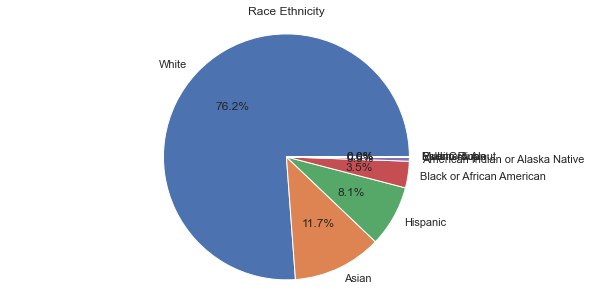

In [31]:
data=df[df['RaceEthnicity']!='Unanswered']
vals=list(data['RaceEthnicity'].value_counts().values)
labels=list(data['RaceEthnicity'].value_counts().index)
plt.figure(figsize=(10,5))
plt.pie(vals,labels=labels,autopct='%1.1f%%')
plt.title('Race Ethnicity')
plt.axis('equal')
plt.show()

#### Businedd Type Owners Race 

In [32]:
data=f_count('RaceEthnicity')
data

Count
BusinessType RaceEthnicity                          
Cooperative  American Indian or Alaska Native      1
             Asian                                81
             Black or African American            12
             Hispanic                             32
             Multi Group                           1
...                                              ...
Trust        Hispanic                              5
             White                                71
Unknown      Asian                                 2
             Hispanic                              4
             White                                 5

[96 rows x 1 columns]

#### Average Loan Amount 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

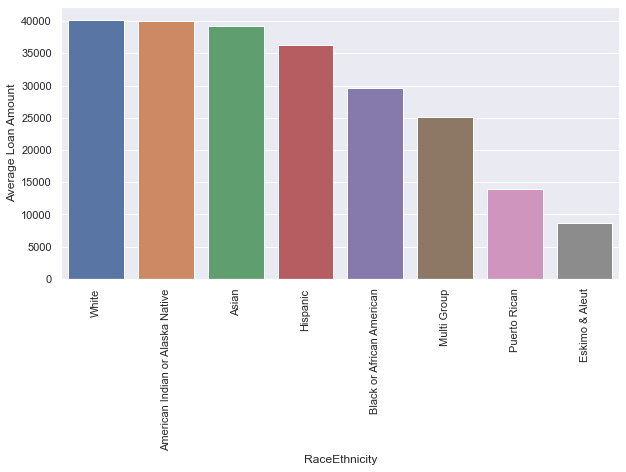

In [33]:
data=f_average('RaceEthnicity')
plt.figure(figsize=(10,5))
sns.barplot(data['RaceEthnicity'],data['Average Loan Amount'])
plt.xticks(rotation=90)

####  Veteran

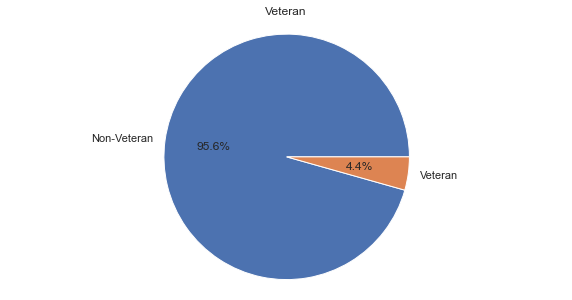

In [34]:
data=df[df['Veteran']!='Unanswered']
vals=list(data['Veteran'].value_counts().values)
labels=list(data['Veteran'].value_counts().index)
plt.figure(figsize=(10,5))
plt.pie(vals,labels=labels,autopct='%1.1f%%')
plt.title('Veteran')
plt.axis('equal')
plt.show()

In [35]:
data=f_count('Veteran')
data

Count
BusinessType                        Veteran            
Cooperative                         Non-Veteran     580
                                    Veteran          23
Corporation                         Non-Veteran  201222
                                    Veteran        9751
Employee Stock Ownership Plan(ESOP) Non-Veteran      27
                                    Veteran           4
Independent Contractors             Non-Veteran    6872
                                    Veteran         188
Joint Venture                       Non-Veteran      70
Limited  Liability Company(LLC)     Non-Veteran  181042
                                    Veteran        9197
Limited Liability Partnership       Non-Veteran    4240
                                    Veteran         206
Non-Profit Childcare Center         Non-Veteran     147
                                    Veteran           4
Non-Profit Organization             Non-Veteran    6891
                                    Veteran         380
Partnership                         Non-Veteran    7658
                                    Veteran         335
Professional Association            Non-Veteran    1928
                                    Veteran          95
Rollover as Business Start-Ups (ROB Non-Veteran       1
Self-Employed Individuals           Non-Veteran    9791
                                    Veteran         256
Sole Proprietorship                 Non-Veteran   93116
                                    Veteran        2945
Subchapter S Corporation            Non-Veteran   81128
                                    Veteran        3812
Tenant in Common                    Non-Veteran      29
                                    Veteran           2
Trust                               Non-Veteran      99
                                    Veteran           5
Unknown                             Non-Veteran     218
                                    Veteran           6

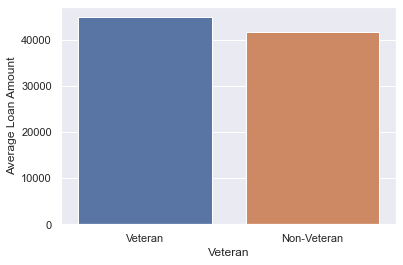

In [36]:
data=f_average('Veteran')
sns.barplot(data['Veteran'],data['Average Loan Amount'])

## Jobs Reported 

### Jobs Reported By Differenct Business Types 

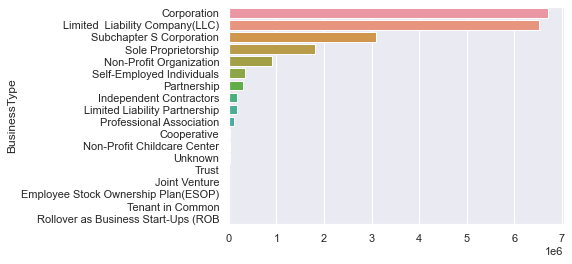

In [37]:
x=df.groupby('BusinessType')['JobsReported'].sum().sort_values(ascending=False)
sns.barplot(x.values,x.index)

### Cities And States with Most Jobs Reported  (Top 10)

In [38]:
x1=df.groupby('City')['JobsReported'].sum().sort_values(ascending=False)[:10]
x2=df.groupby('State')['JobsReported'].sum().sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'States')

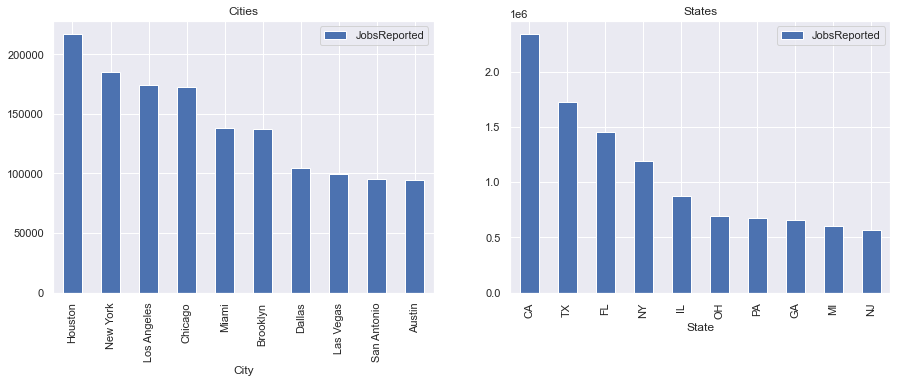

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

x1.plot(kind='bar',ax=axes[0],legend=True)
x2.plot(kind='bar',ax=axes[1],legend=True)


axes[0].set_title('Cities')
axes[1].set_title('States')

## Time Series Analysis (Jobs Reported And Loan Amount)

In [40]:
data=df.loc[:,['JobsReported','DateApproved','LoanAmount']]
data.index=data['DateApproved']
data.drop('DateApproved',axis=1,inplace=True)

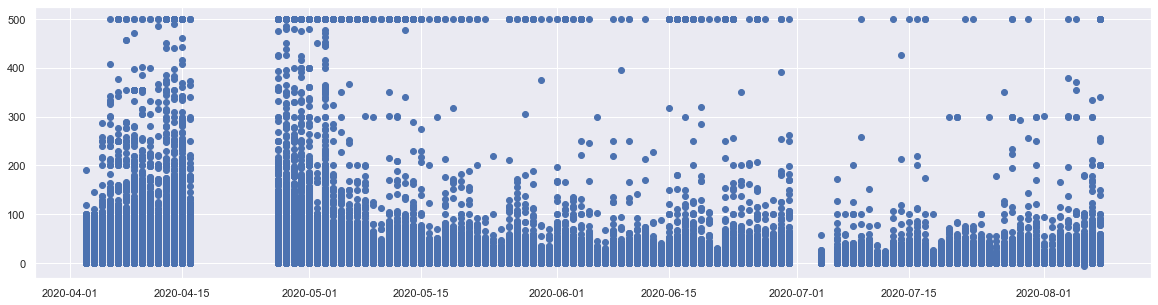

In [41]:
plt.figure(figsize=(20,5))
plt.scatter(data.index,data['JobsReported'])

### Jobs Reported In each month 

In [42]:
data['JobsReported'].resample('M').sum()

DateApproved
2020-04-30   13042468.000
2020-05-31    5309688.000
2020-06-30    1076431.000
2020-07-31     474788.000
2020-08-31     303390.000
Freq: M, Name: JobsReported, dtype: float64

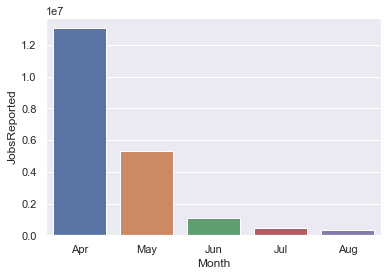

In [43]:
x=data['JobsReported'].resample('M').sum().sort_values(ascending=False)
x=x.reset_index()
x['Month']=x['DateApproved'].apply(lambda x:x.strftime("%b"))
sns.barplot(x['Month'],x['JobsReported'])

### Loan Amount Sum in each Month 

In [44]:
data['LoanAmount'].resample('M').sum()

DateApproved
2020-04-30   93940125492.879
2020-05-31   38945714680.000
2020-06-30    7739043440.725
2020-07-31    4005993685.710
2020-08-31    2420810218.520
Freq: M, Name: LoanAmount, dtype: float64

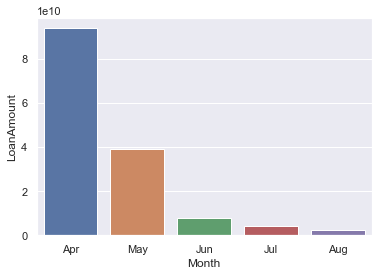

In [45]:
x=data['LoanAmount'].resample('M').sum().sort_values(ascending=False)
x=x.reset_index()
x['Month']=x['DateApproved'].apply(lambda x:x.strftime("%b"))
sns.barplot(x['Month'],x['LoanAmount'])

### Checking for Random Walk (If current Value is related to previous values)

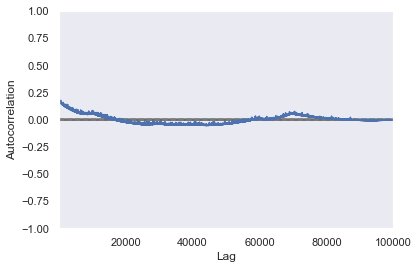

In [46]:
autocorrelation_plot(data['JobsReported'][:100000])
plt.show()

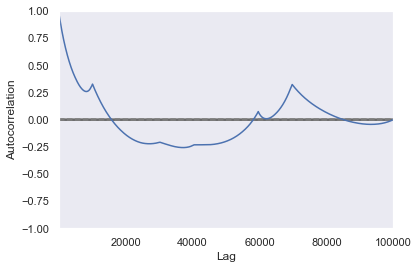

In [47]:
autocorrelation_plot(data['LoanAmount'][:100000])
plt.show()

### Stationarity Check 

In [70]:
data=df.loc[:100000,['DateApproved','JobsReported','LoanAmount']]
data=data.sort_index()
data.index=data['DateApproved']
data.drop('DateApproved',axis=1,inplace=True)

In [71]:
X=data['JobsReported']

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.100130
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [72]:
X=data['LoanAmount']

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.971424
p-value: 0.001568
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Seasonality Check 

<Figure size 720x360 with 0 Axes>

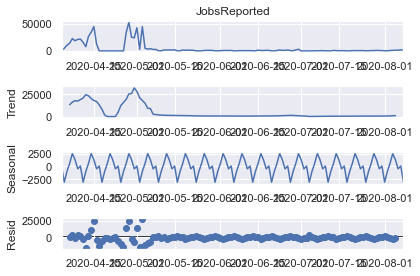

In [73]:
series = data['JobsReported'].resample('D').sum()
result = seasonal_decompose(series, model='additive')
plt.figure(figsize=(10,5))
result.plot()
plt.show()

<Figure size 720x360 with 0 Axes>

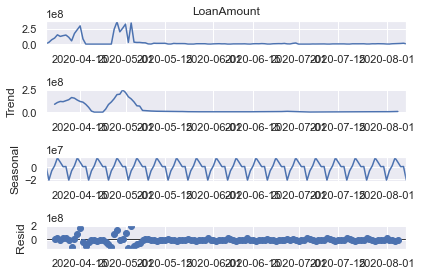

In [74]:
series = data['LoanAmount'].resample('D').sum()
result = seasonal_decompose(series, model='additive')
plt.figure(figsize=(10,5))
result.plot()
plt.show()

### AutoCorrelation 

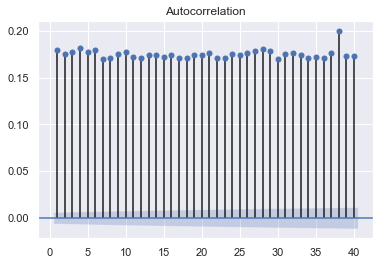

In [75]:
sgt.plot_acf(data['JobsReported'],lags=40,zero=False)
plt.show()

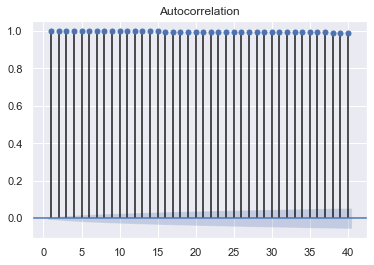

In [76]:
sgt.plot_acf(data['LoanAmount'],lags=40,zero=False)
plt.show()

## Forecasting

In [77]:
data1=data.loc[:,['JobsReported']]
data1=data1.resample('D').sum()
data_train=data1[['JobsReported']]
data_train=data_train.reset_index()
data_train.columns=['ds','y']
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(data_train) #

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
# predict for five months in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 20)  
# now lets make the forecasts
forecast = model.predict(future)
forecast = forecast.loc[len(data_train):]
forecast = forecast[['ds', 'yhat']]
forecast.columns=['Date','JobsReported']
data_train.columns=['Date','JobsReported']

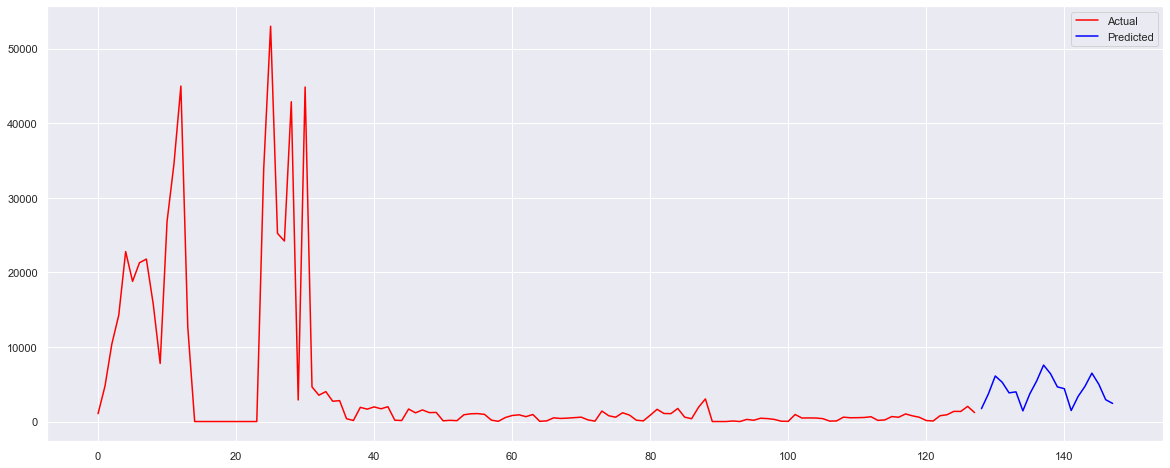

In [79]:
data_train['JobsReported'].plot(figsize=(20,8),color='red',label='Actual')
forecast['JobsReported'].plot(figsize=(20,8),color='blue',label='Predicted')
plt.legend()